# Measurements performed for:
## 1. 10 m chirping and 80 m delaying fiber
### STRANGE RESULT: very strong (hard to explain) oscillations in phase difference
#### _____ extracted shear 3 times bigger than measured in single measurements (it doesn't influence oscillations)
#### _____ visibility near 0.9

## 2. 20 m chirping and 80 m delaying fiber
### USELESS MEASUREMENTS: I did not turn off EOPM while saving temporal phase spectrum

## 3. 40 m chirping & delaying fiber
### NOT THAT BAD: extracted parabolic spectral phase 
#### ______ smoothed oscillations with EOPM period, 
#### ______ phase is ~200% to big if extracted shear was used
#### ______ phase is ~50% to big if shear measured in separate measurement was used
#### ______ visibility of 0.95 makes it hard to find pulses ratio

## 4. 80 m chirping & delaying fiber
### GOOD?: predictions consistent with model
#### _____ no oscillations in phase difference
#### _____ shear recovered with algorithm (visibility of 0.8)
#### _____ didn't ***save*** value of shear in separate measurement (I did measure that)

## 5. 150 m chirping & delaying fiber

### WELL...: my SPIDER algorithm failed because of multiple peaks in FT, but...
#### _____ unable to eliminate oscillations in shear measurements
#### _____ greatest AC peak in FT at ~90 ps, while expected at ~150 ps
#### _____ when algorithm was temporary changed to deal with multipeak cases, quasi-parabolic phase was extracted,
#### _____ extracted shear nearly 4 times lower than measured in separate measurements
#### _____ with extracted shear order of magnitude of phase is consistent with predictions for fiber of 90 ps delay ~ 90 m length
#### _____ (strange?) oscillations of visibility ~1/4 in sheared DC

# Load data & find shears

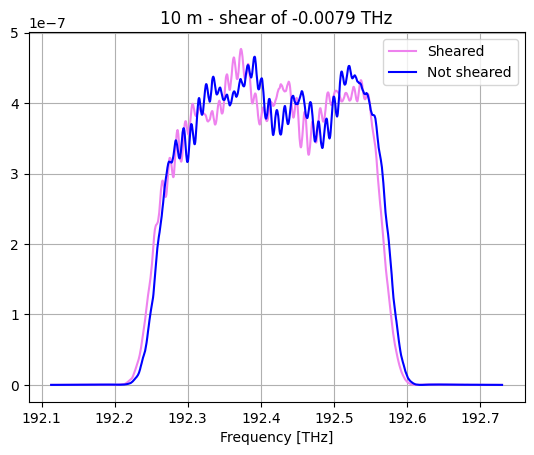

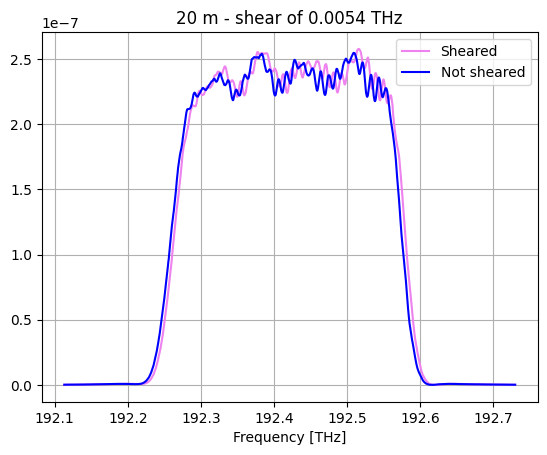

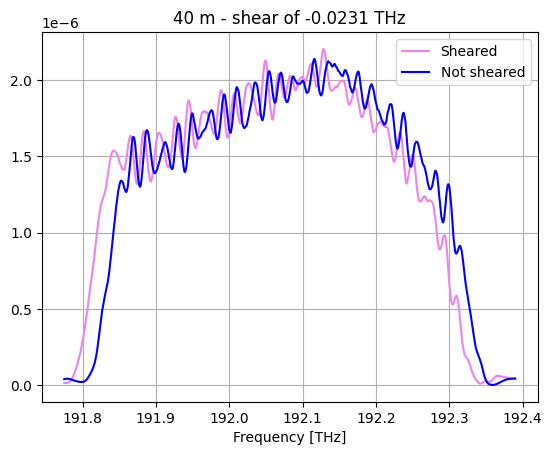

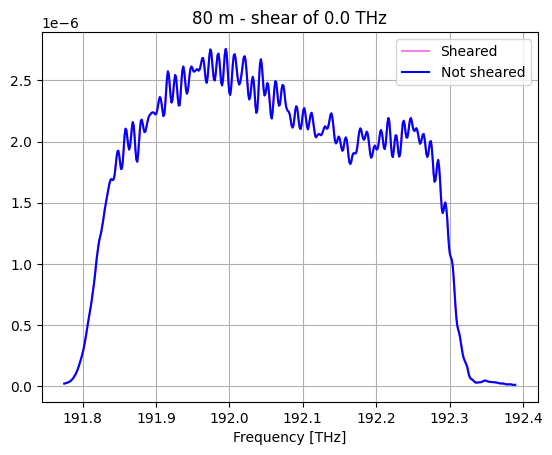

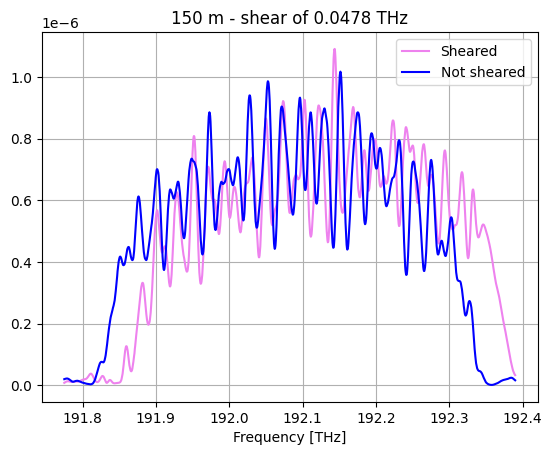

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spectral_analysis as sa
from math import floor
import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

sheared10 = sa.load_csv("data/10m_shear.csv")
not_sheared10 = sa.load_csv("data/10m_no_shear.csv")
sheared20 = sa.load_csv("data/20m_shear.csv")
not_sheared20 = sa.load_csv("data/20m_no_shear.csv")
sheared40 = sa.load_csv("data/40m_shear.csv")
not_sheared40 = sa.load_csv("data/40m_no_shear.csv")
sheared80 = sa.load_csv("data/80m_shear.csv")
not_sheared80 = sa.load_csv("data/80m_no_shear.csv")
sheared150 = sa.load_csv("data/150m_shear.csv")
not_sheared150 = sa.load_csv("data/150m_no_shear.csv")

sheared10.wl_to_freq()
not_sheared10.wl_to_freq()
sheared20.wl_to_freq()
not_sheared20.wl_to_freq()
sheared40.wl_to_freq()
not_sheared40.wl_to_freq()
sheared80.wl_to_freq()
not_sheared80.wl_to_freq()
sheared150.wl_to_freq()
not_sheared150.wl_to_freq()

sa.compare_plots([sheared10, not_sheared10], title = "10 m - shear of {} THz".format(round(sa.find_shift(sheared10, not_sheared10), 4)), legend = ["Sheared", "Not sheared"])
shear40 = sa.find_shift(sheared10, not_sheared10)
sa.compare_plots([sheared20, not_sheared20], title = "20 m - shear of {} THz".format(round(sa.find_shift(sheared20, not_sheared20), 4)), legend = ["Sheared", "Not sheared"])
shear40 = sa.find_shift(sheared20, not_sheared20)
sa.compare_plots([sheared40, not_sheared40], title = "40 m - shear of {} THz".format(round(sa.find_shift(sheared40, not_sheared40), 4)), legend = ["Sheared", "Not sheared"])
shear40 = sa.find_shift(sheared40, not_sheared40)
sa.compare_plots([sheared80, not_sheared80], title = "80 m - shear of {} THz".format(round(sa.find_shift(sheared80, not_sheared80), 4)), legend = ["Sheared", "Not sheared"])
shear80 = sa.find_shift(sheared80, not_sheared80)
sa.compare_plots([sheared150, not_sheared150], title = "150 m - shear of {} THz".format(round(sa.find_shift(sheared150, not_sheared150), 4)), legend = ["Sheared", "Not sheared"])
shear150 = sa.find_shift(sheared150, not_sheared150)

# Load SPIDER spectra

In [2]:
p_spectrum_10 = sa.load_csv("data/10m_pspectrum.csv")
t_spectrum_10 = sa.load_csv("data/10m_tspectrum.csv")

p_spectrum_20 = sa.load_csv("data/20m_pspectrum.csv")
t_spectrum_20 = sa.load_csv("data/20m_tspectrum.csv")

p_spectrum_40 = sa.load_csv("data/40m_pspectrum.csv")
t_spectrum_40 = sa.load_csv("data/40m_tspectrum.csv")

p_spectrum_80 = sa.load_csv("data/80m_pspectrum.csv")
t_spectrum_80 = sa.load_csv("data/80m_tspectrum.csv")

p_spectrum_150 = sa.load_csv("data/150m_pspectrum.csv")
t_spectrum_150 = sa.load_csv("data/150m_tspectrum.csv")

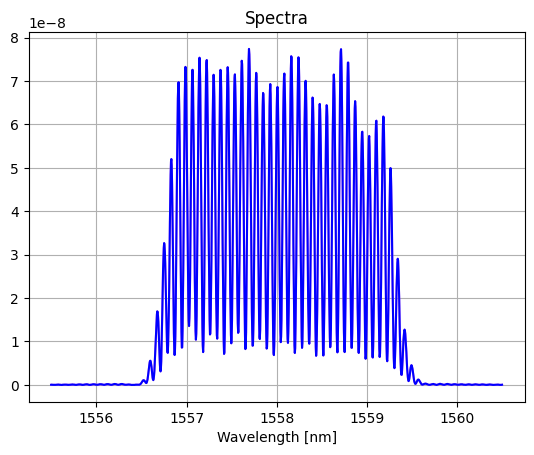

In [3]:
sa.compare_plots([p_spectrum_20, t_spectrum_20])

# SPIDER 10 m

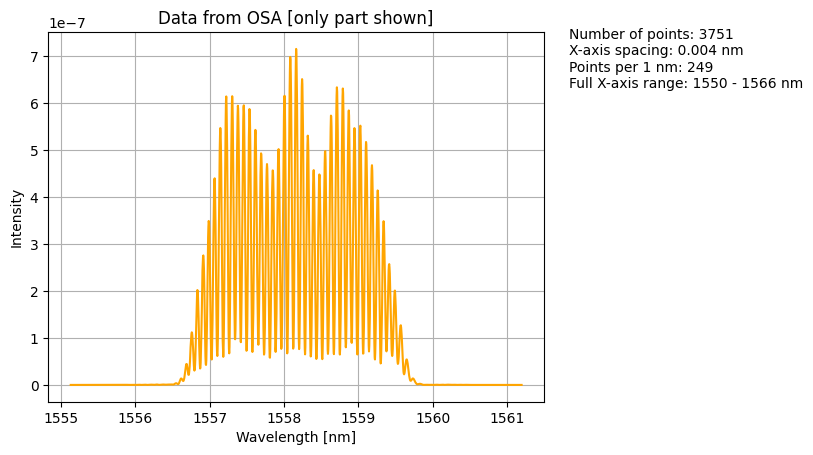

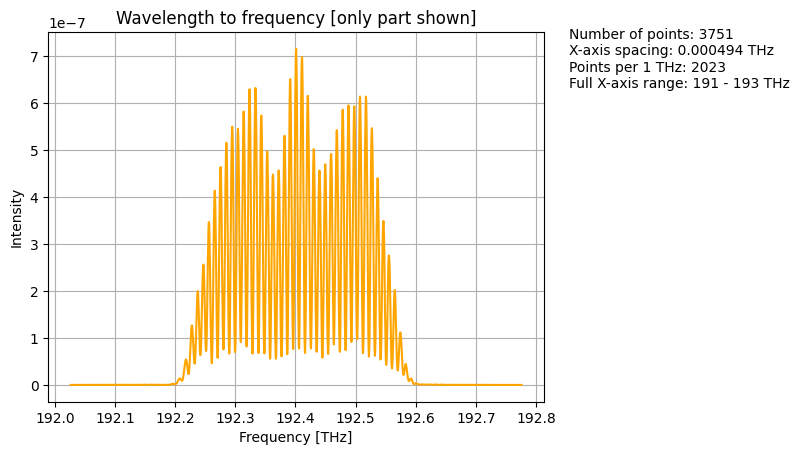

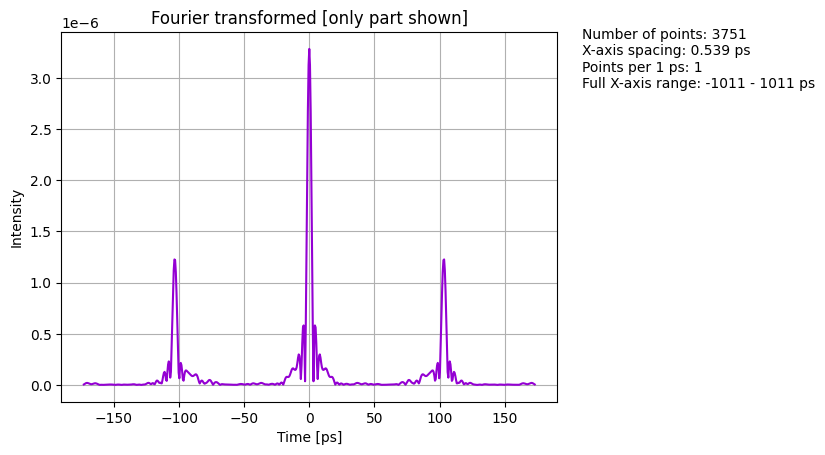

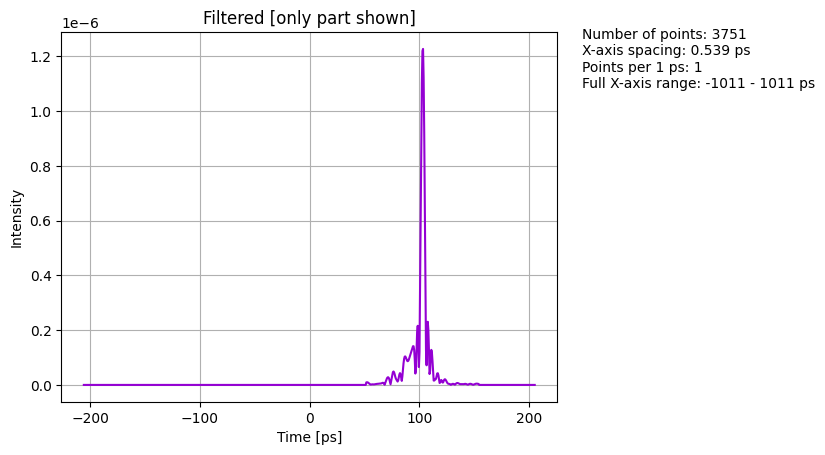

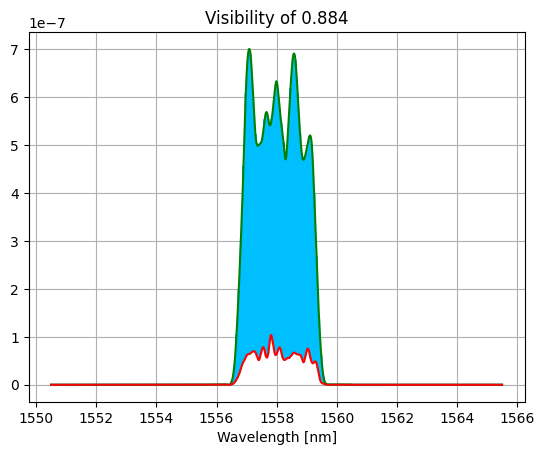

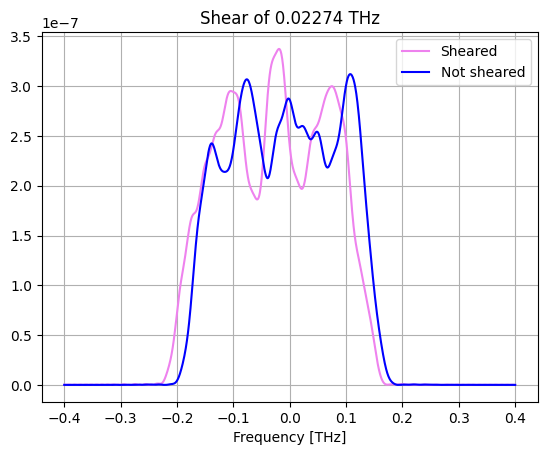

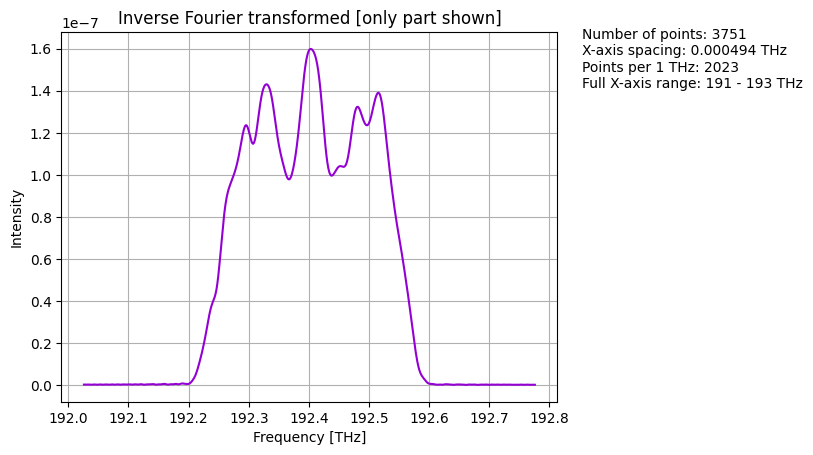

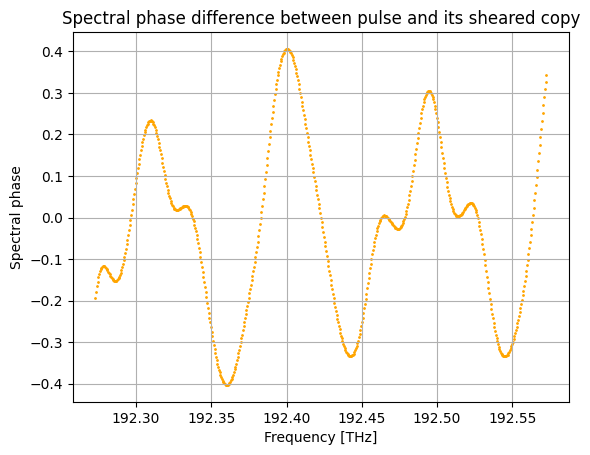

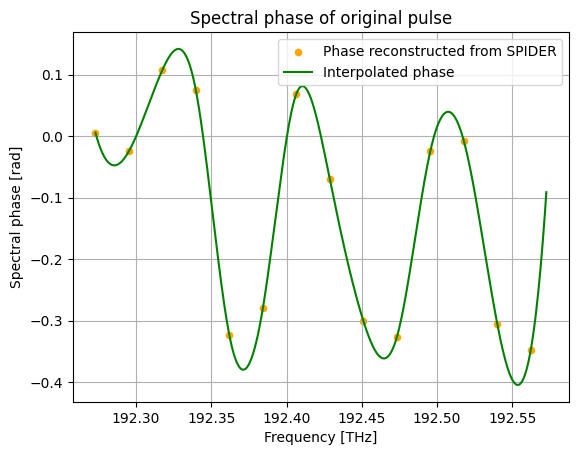

In [4]:
start = 192.25
end = 192.55

pulse40 = sa.spider(phase_spectrum = p_spectrum_10,
        temporal_spectrum = t_spectrum_10,
        shear = None, # np.abs(shear40),
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        smoothing_period = None,
        plot_steps = True,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

# SPIDER 40 m

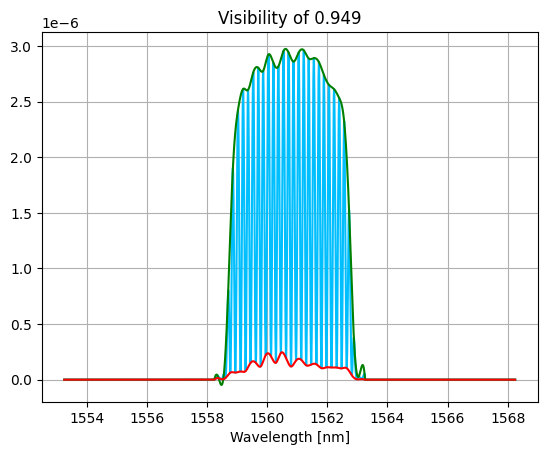

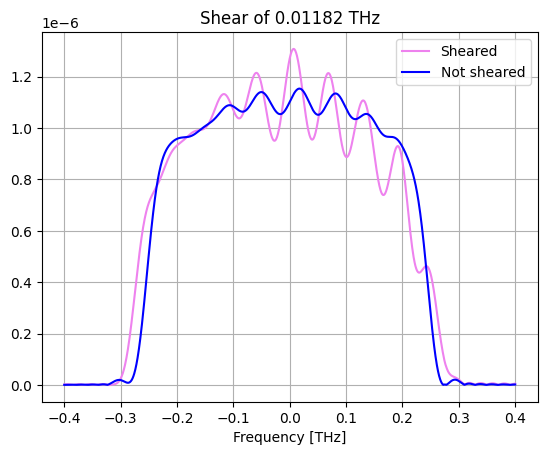

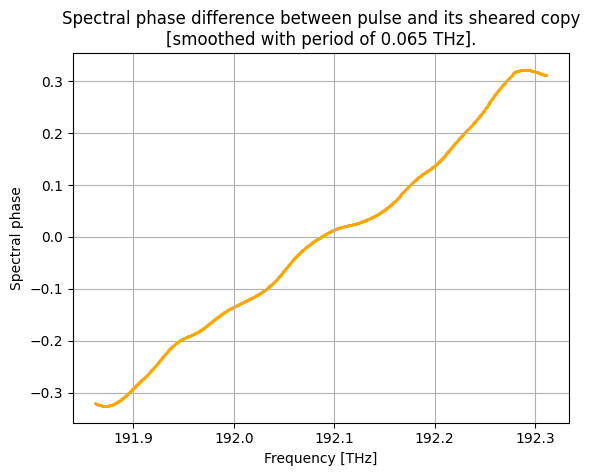

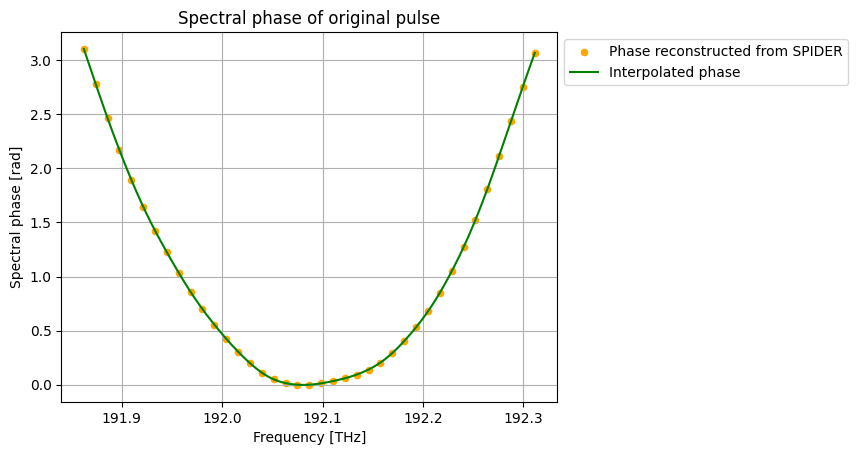

In [5]:
start = 191.85
end = 192.3

pulse40 = sa.spider(phase_spectrum = p_spectrum_40,
        temporal_spectrum = t_spectrum_40,
        shear = None,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        smoothing_period = 0.065,
        plot_steps = False,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]
    
pulse40.save("40m_extracted_smoothed.csv")

# SPIDER 80 m

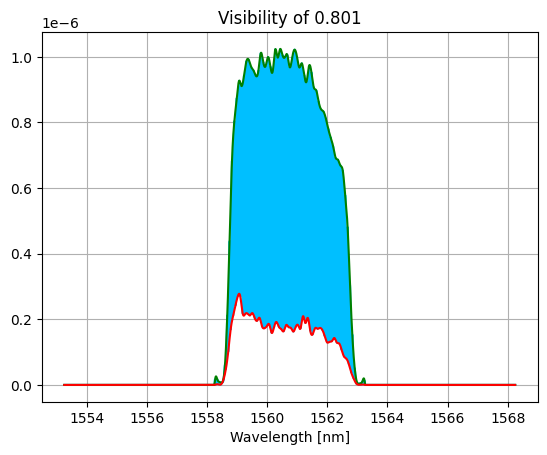

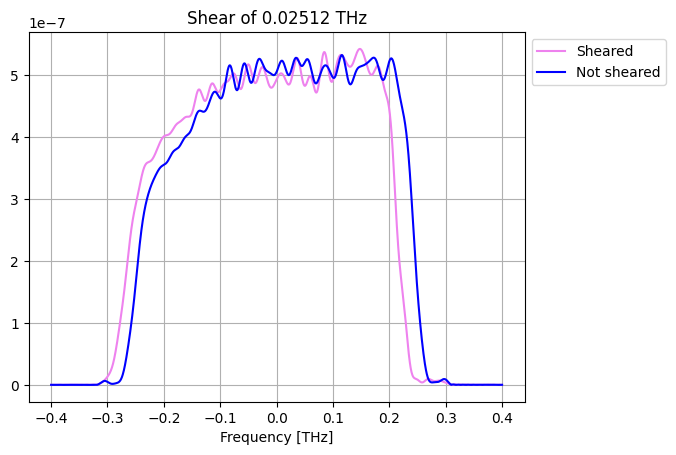

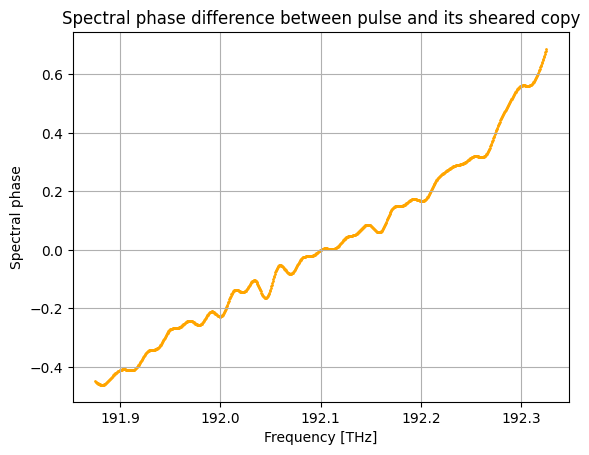

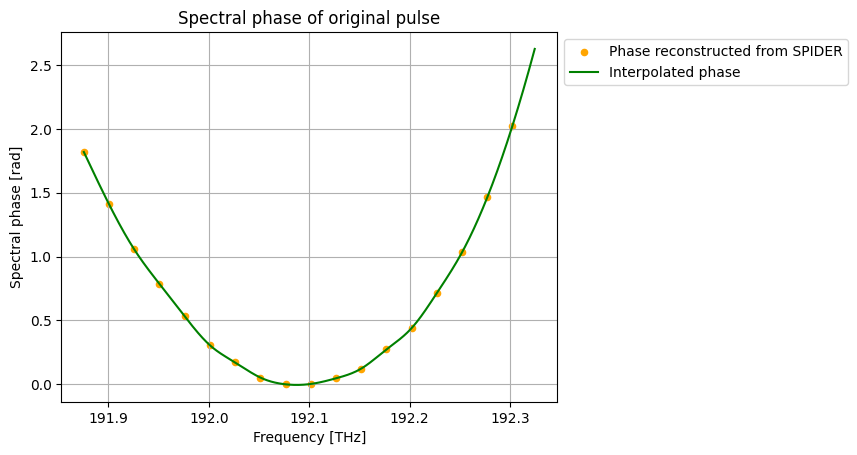

In [6]:
start = 191.85
end = 192.3

pulse80 = sa.spider(phase_spectrum = p_spectrum_80,
        temporal_spectrum = t_spectrum_80,
        shear = None,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        smoothing_period = None,#0.065,
        plot_steps = False,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

pulse80.save("80m_extracted_not_smoothed.csv")

# SPIDER 150 m

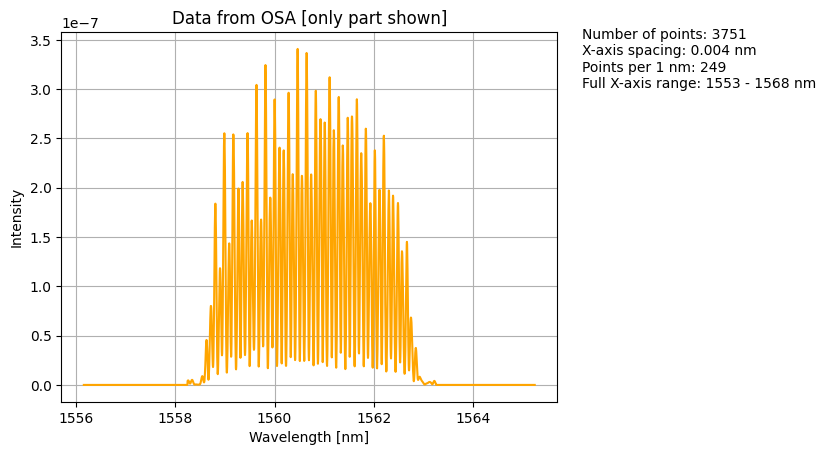

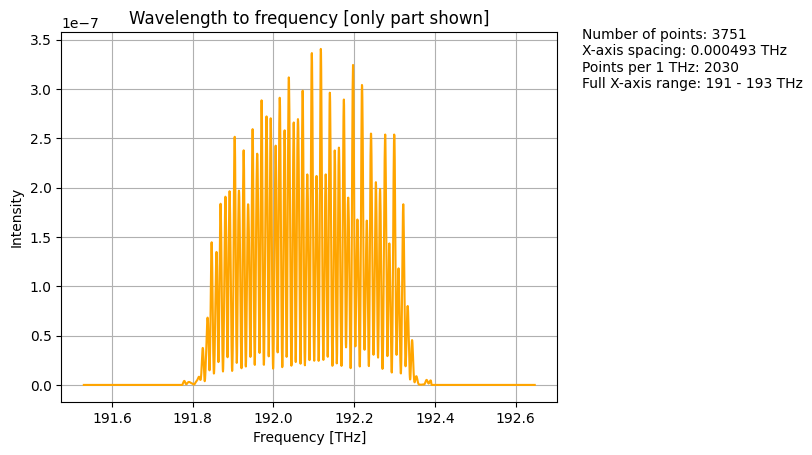

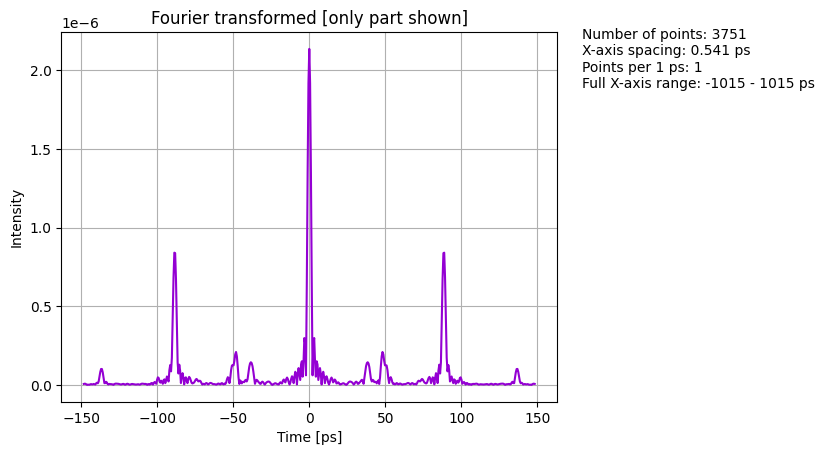

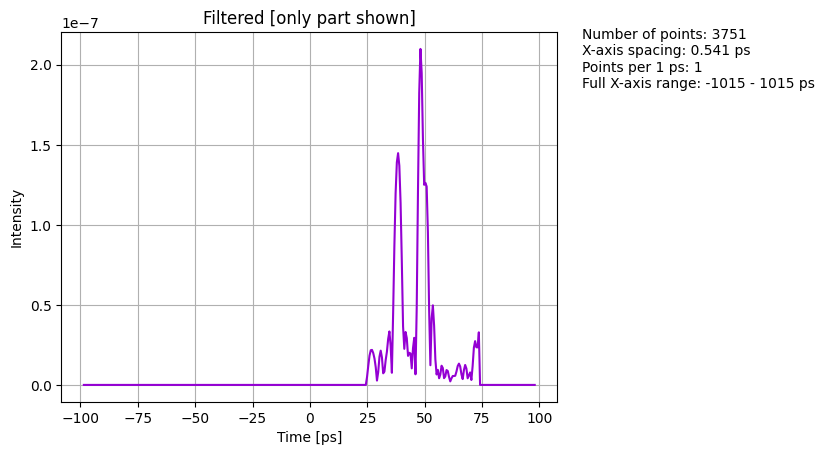

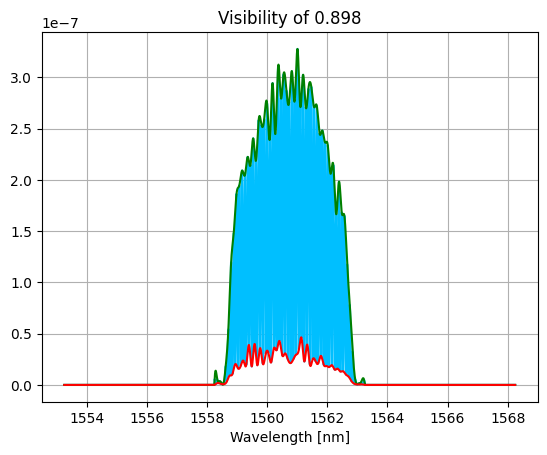

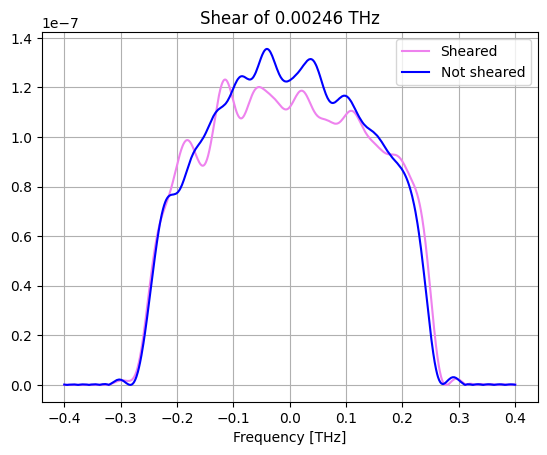

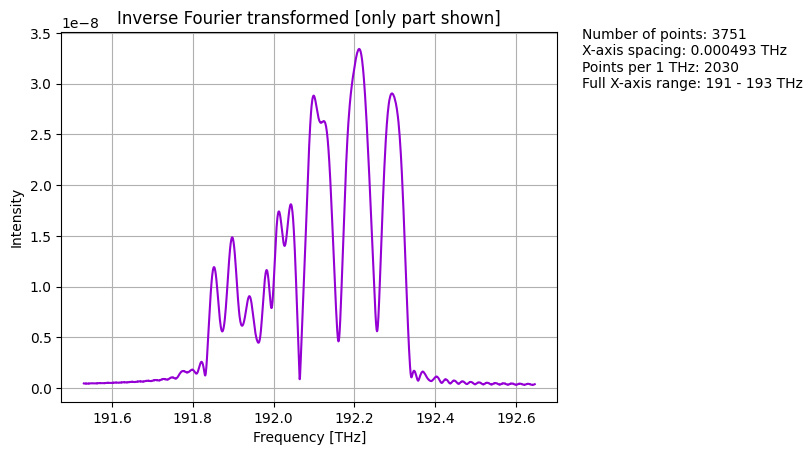

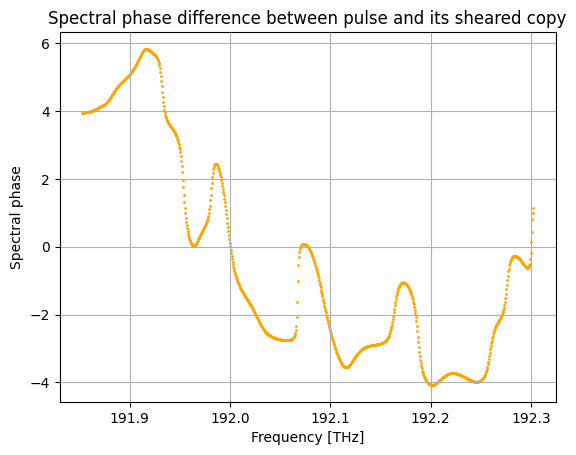

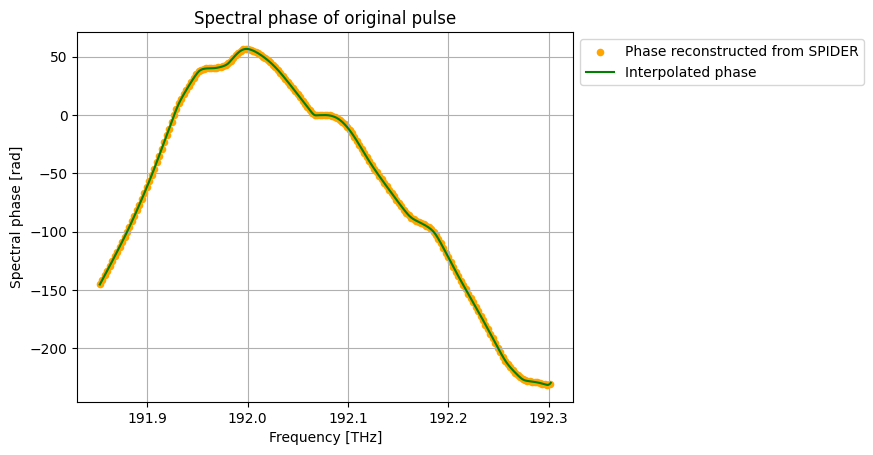

In [7]:
start = 191.85
end = 192.3

pulse150 = sa.spider(phase_spectrum = p_spectrum_150,
        temporal_spectrum = t_spectrum_150,
        shear = None,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        smoothing_period = None,
        plot_steps = True,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

# SPIDER 40 m - model

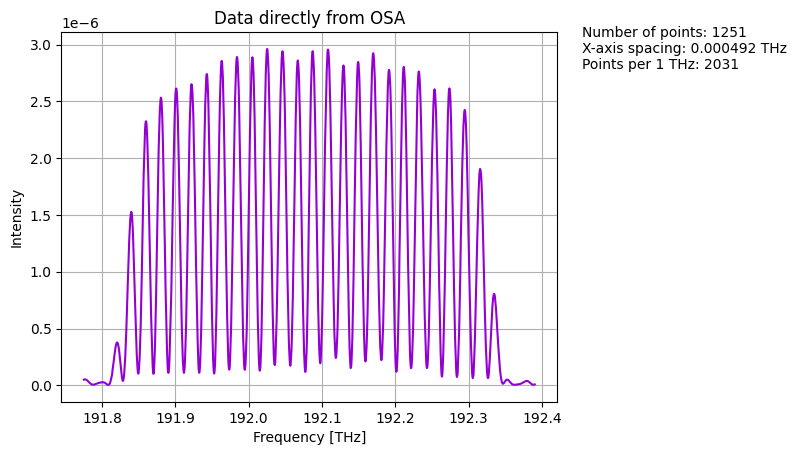

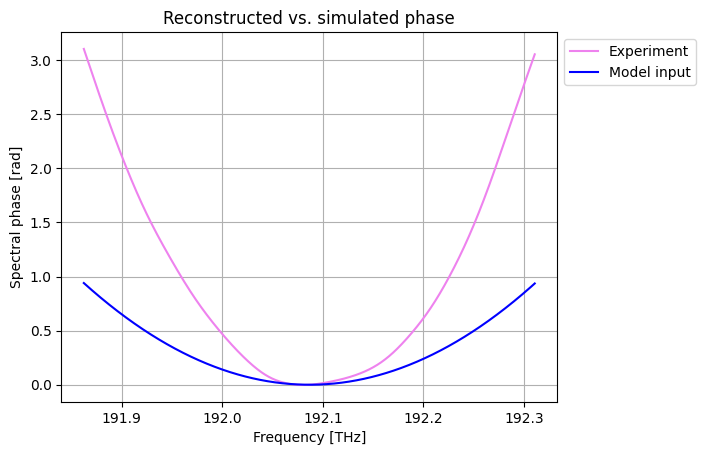

In [8]:
X = pulse40.X

def phase(f, f_mean, fiber_length):
    l_0 = 1560
    c = 3*1e8
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

phase = np.vectorize(phase)

Y = phase(X, np.mean(X), 43)

sim_pulse = sa.spectrum(X, Y, "freq", "phase")

freq_spectrum = t_spectrum_40.wl_to_freq(inplace = False)
sa.plot(freq_spectrum, title = "Data directly from OSA")
sa.compare_plots([pulse40, sim_pulse], title = "Reconstructed vs. simulated phase", legend = ["Experiment", "Model input"])

# SPIDER 80 m - model

C:\Users\rewas\AppData\Local\Temp\ipykernel_16612\2108538032.py:9: RuntimeWarning: overflow encountered in long_scalars
  return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2


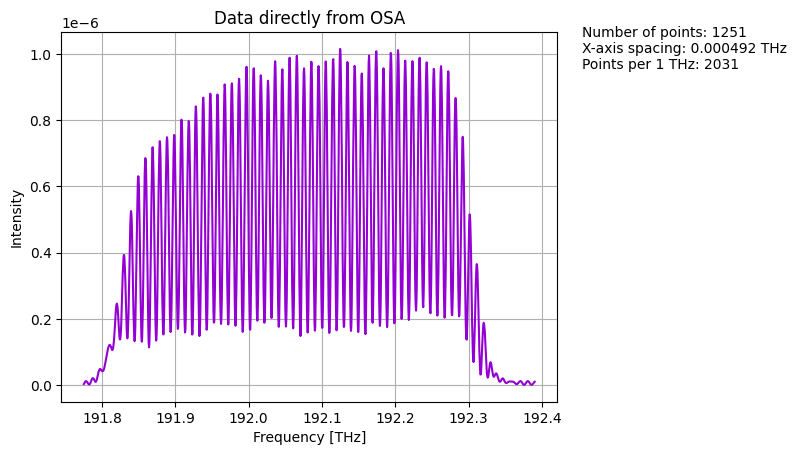

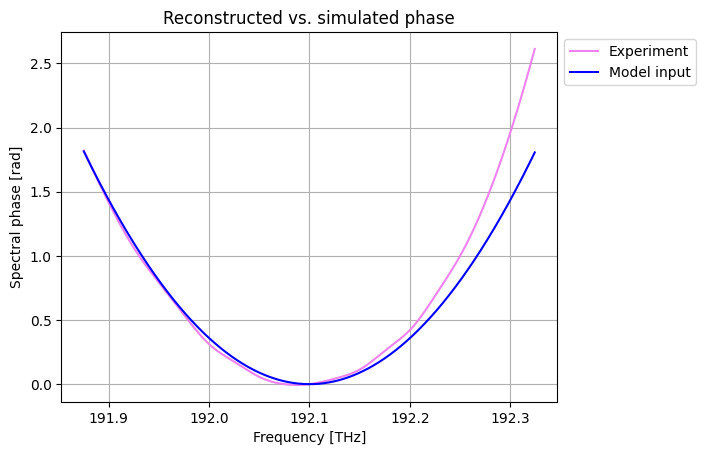

In [9]:
X = pulse80.X
Y = phase(X, np.mean(X), 83)

sim_pulse = sa.spectrum(X, Y, "freq", "phase")

freq_spectrum = p_spectrum_80.wl_to_freq(inplace = False)
sa.plot(freq_spectrum, title = "Data directly from OSA")
sa.compare_plots([pulse80, sim_pulse], title = "Reconstructed vs. simulated phase", legend = ["Experiment", "Model input"])